# MONITOR DE EFICIENCIA


#### ⚠️ Pruebas para deteccion de directorio - Proyecto

In [3]:
import os
print(f"Estoy parado en: {os.getcwd()}")
print(f"Lo que veo en ../src es: {os.listdir('../src')}")

Estoy parado en: d:\LEARNING\PROYECTO\notebooks
Lo que veo en ../src es: ['funciones_petroleras.py', 'generar_datos_masivos.py', 'procesamiento.py', 'reporte_motor.py', '__pycache__']


In [4]:
import os
import sys

ruta_src = os.path.abspath("../src")
print(f"Buscando en: {ruta_src}")
print(f"¿Existe la carpeta?: {os.path.exists(ruta_src)}")
if os.path.exists(ruta_src):
    print(f"Archivos encontrados: {os.listdir(ruta_src)}")

Buscando en: d:\LEARNING\PROYECTO\src
¿Existe la carpeta?: True
Archivos encontrados: ['funciones_petroleras.py', 'generar_datos_masivos.py', 'procesamiento.py', 'reporte_motor.py', '__pycache__']


#### ⚠️ Conexión entre carpetas [PRUEBAS DE DIAGNOSTICOS]

In [5]:
import sys
import os

# Agregamos la carpeta 'src' al camino de búsqueda de Python
sys.path.append(os.path.abspath("../src"))

# Ahora sí, importamos tu función
from funciones_petroleras import procesar_datos_produccion

# Probamos la función con el archivo que tenés en la carpeta 'datos'
df_resultado = procesar_datos_produccion("datos_campo.csv")

if df_resultado is not None:
    print("✅ ¡Misión cumplida! Datos procesados desde carpetas separadas.")
    display(df_resultado.head())

✅ ¡Misión cumplida! Datos procesados desde carpetas separadas.


,pozo_id,prod_teorica_bpd,prod_real_bpd,eficiencia,barriles_perdidos
0,AN-X001,500,450.0,90.000000,50.0
1,AN-X002,800,200.0,25.000000,600.0
2,AN-X003,600,580.0,96.666667,20.0
3,AN-X004,1000,-50.0,-5.000000,1050.0
4,AN-X005,700,NaN,NaN,NaN


In [6]:
import pandas as pd
import numpy as np

# Generamos 100 pozos de la Cuenca Neuquina
np.random.seed(42)
n_pozos = 100

data = {
    'pozo_id': [f'AN-X{i:03}' for i in range(1, n_pozos + 1)],
    'prod_teorica_bpd': np.random.uniform(200, 1000, n_pozos), # Barriles por día
    'prod_real_bpd': np.random.uniform(150, 950, n_pozos),
    'presion_psi': np.random.uniform(300, 600, n_pozos),
    'temp_c': np.random.uniform(60, 90, n_pozos)
}

df = pd.DataFrame(data)

# Simulamos que algunos pozos tienen una falla crítica (Producción Real muy baja)
df.loc[df.sample(5).index, 'prod_real_bpd'] *= 0.3

## 1. Eficiencia de Producción.

La Fórmula:
$Eficiencia (\%) = \left( \frac{Producción Real}{Producción Teórica} \right) \times 100$

#### Objetivo

1. Crear una nueva columna en el DataFrame llamada **eficiencia**.

2. Identificar los pozos cuya eficiencia sea menor al 70% (esto en el campo es una alerta roja).

3. Guardá esos pozos críticos en una variable nueva llamada *"prioridad_intervencion"*.

**Analista Rojas**: ¿Cómo viene esa carga de datos? Pasame el código de cómo calculaste esa eficiencia y decime cuántos pozos detectaste que necesitan que mandemos la camioneta urgente.

**Recordá**: Estamos trabajando volumen, así que usá las funciones de *pandas* para hacerlo de un solo golpe, nada de bucles for lentos. ¡Te leo!

In [7]:
df.head()

,pozo_id,prod_teorica_bpd,prod_real_bpd,presion_psi,temp_c
0,AN-X001,499.632095,175.143349,492.609494,61.550452
1,AN-X002,960.571445,659.128329,325.241989,75.940639
2,AN-X003,785.595153,401.484785,348.488614,76.219054
3,AN-X004,678.926787,556.856553,569.566257,79.122897
4,AN-X005,324.814912,876.053179,481.928718,81.782740


In [8]:
#PROCESO
#Nos aseguramos de que ambas columnas sean números. Si son texto (strings), el cálculo fallará.
df['prod_real_bpd'] = pd.to_numeric(df['prod_real_bpd'], errors='coerce')
df['prod_teorica_bpd'] = pd.to_numeric(df['prod_teorica_bpd'], errors='coerce')

#Evitamos una indeterminacion
df['eficiencia'] = (df['prod_real_bpd'] / df['prod_teorica_bpd'].replace(0, np.nan)) * 100

#Utilizamos el metodo .query() para filtrar. 
prioridad_intervencion = df.query('eficiencia < 70')
prioridad_intervencion


,pozo_id,prod_teorica_bpd,prod_real_bpd,presion_psi,temp_c,eficiencia
0,AN-X001,499.632095,175.143349,492.609494,61.550452,35.054463
1,AN-X002,960.571445,659.128329,325.241989,75.940639,68.618355
2,AN-X003,785.595153,401.484785,348.488614,76.219054,51.105812
8,AN-X009,680.892009,333.038532,301.518475,83.855586,48.912093
9,AN-X010,766.458062,211.583928,348.242415,68.124968,27.605415
11,AN-X012,975.927882,278.977030,507.568559,62.353691,28.585824
17,AN-X018,619.805145,299.256047,523.947422,65.198830,48.282279
23,AN-X024,493.089475,238.041540,410.314741,68.398017,48.275526
24,AN-X025,564.855987,332.348130,379.560710,88.645958,58.837675
25,AN-X026,828.140769,491.686231,373.196893,82.136908,59.372301


## 2. Cuantificar el impacto económico.

1. Necesitamos saber cuántos barriles estamos dejando de ganar por esa ineficiencia.

2. **Calculamos la pérdida**: Creamos una columna *barriles_perdidos* que es la diferencia de lo teorico a lo real

3. **Impacto Total**: Son todos los barriles perdidos de la lista de la prioridad a intervenir.

4. Se estima que en Vaca Muerta, el barril está rondando los **75 USD**.

In [9]:
#Modelo 1
# 1. Calculas la pérdida para todos
    #df['barriles_perdidos'] = df['prod_teorica_bpd'] - df['prod_real_bpd']
# 2. Filtras para mostrar solo los de baja eficiencia con su nueva columna
    #prioridad_intervencion = df[df['eficiencia'] < 50]
#3. Sumamos todas las perdidas
    #total_perdido = prioridad_intervencion['barriles_perdidos'].sum()


#Modelo 2
# Calculamos la pérdida solo para los que tienen < 70% de eficiencia
prioridad_intervencion = df[df['eficiencia'] < 70].copy() 
# Filtras para mostrar solo los de baja eficiencia con su nueva columna
prioridad_intervencion['barriles_perdidos'] = prioridad_intervencion['prod_teorica_bpd'] - prioridad_intervencion['prod_real_bpd']

#Calculamos el impacto total de estas pérdidas
impacto_total = prioridad_intervencion['barriles_perdidos'].sum()
valor_perdida=impacto_total*75

print(f"\n⚠️ La pérdida total acumulada por baja eficiencia es: {valor_perdida:.2f} USD\n")





⚠️ La pérdida total acumulada por baja eficiencia es: 1127378.40 USD



De esos pozos en prioridad_intervencion, *¿cuál es el que más nos hace perder dinero?* No el que tiene menor eficiencia, sino el que tiene la mayor cantidad de barriles perdidos. (A veces un pozo con 60% de eficiencia pierde más barriles que uno con 20% si el primero es un pozo "gigante").

In [10]:
maxima_perdida = prioridad_intervencion['barriles_perdidos'].max()
print(f"\nLa mayor pérdida registrada es de: {maxima_perdida:.4f} bpd\n")
print('-'*30)
# Busca el índice del valor máximo y extrae la fila completa
pozo_critico = prioridad_intervencion.loc[prioridad_intervencion['barriles_perdidos'].idxmax()]

print("--- El pozo con mayor lucro cesante es: ---")
pozo_critico


La mayor pérdida registrada es de: 753.0102 bpd

------------------------------
--- El pozo con mayor lucro cesante es: ---


pozo_id                 AN-X074
prod_teorica_bpd     852.369143
prod_real_bpd         99.358986
presion_psi          573.972166
temp_c                80.490203
eficiencia            11.656802
barriles_perdidos    753.010157
Name: 73, dtype: object

#### El método visual: .sort_values()
Para ver el **"Top 5"** de los que más pérdida ocasionan para priorizar reparaciones:

In [11]:
# Ordena de mayor a menor y muestra los primeros 5
top_perdidas = prioridad_intervencion.sort_values(by='barriles_perdidos', ascending=False)
top_perdidas.head(5)


,pozo_id,prod_teorica_bpd,prod_real_bpd,presion_psi,temp_c,eficiencia,barriles_perdidos
73,AN-X074,852.369143,99.358986,573.972166,80.490203,11.656802,753.010157
11,AN-X012,975.927882,278.977030,507.568559,62.353691,28.585824,696.950852
52,AN-X053,951.599153,265.915898,555.341001,79.760809,27.944108,685.683256
55,AN-X056,937.499388,343.644217,467.040379,79.272578,36.655407,593.855171
9,AN-X010,766.458062,211.583928,348.242415,68.124968,27.605415,554.874134


##### ⚠️ [PRUEBA] Creamos una funcion para llamar a cualquier pozo

In [12]:
def saludar_pozo(pozo_nombre):
    print(f"Hola, el pozo {pozo_nombre} está operativo.")

    # Llamada a la función con el "parámetro"
saludar_pozo("AN-X056")
print("Prueba Exitosa - Conexión Establecida")

Hola, el pozo AN-X056 está operativo.
Prueba Exitosa - Conexión Establecida


### Creación de reporte de Análisis

In [13]:
from funciones_petroleras import generar_resumen_ejecutivo

# 1. Obtenemos el diccionario con las métricas
resumen = generar_resumen_ejecutivo(df_resultado)

if resumen:
    print("--- 📄 RESUMEN EJECUTIVO DE OPERACIONES ---")
    print(f"🔹 Eficiencia Promedio: {resumen['eficiencia_promedio']:.2f}%")
    print(f"🔹 Total Barriles Perdidos: {resumen['total_barriles_perdidos']} bpd")
    print(f"🔹 Pozo con mayor pérdida: {resumen['pozo_critico_id']}")
    print(f"🔹 Pozos en alerta (<70%): {resumen['cantidad_pozos_alerta']}")
    print(f"💰 Impacto Económico Diario: USD {resumen['potencial_mejora_usd']:,}")

--- 📄 RESUMEN EJECUTIVO DE OPERACIONES ---
🔹 Eficiencia Promedio: 51.67%
🔹 Total Barriles Perdidos: 1720.0 bpd
🔹 Pozo con mayor pérdida: AN-X004
🔹 Pozos en alerta (<70%): 2
💰 Impacto Económico Diario: USD 129,000.0


## 3. Categorización de Pozos por Prioridad

In [14]:

from funciones_petroleras import procesar_datos_produccion, categorizar_pozos

df = procesar_datos_produccion("datos_campo.csv")
df = categorizar_pozos(df)

# Ordenamos por barriles perdidos para ver dónde está el verdadero problema
df_ranking = df.sort_values(by='barriles_perdidos', ascending=False)
print(df_ranking[['pozo_id', 'eficiencia', 'categoria', 'barriles_perdidos']])

   pozo_id  eficiencia  categoria  barriles_perdidos
3  AN-X004   -5.000000    Crítico             1050.0
1  AN-X002   25.000000    Crítico              600.0
0  AN-X001   90.000000     Óptimo               50.0
2  AN-X003   96.666667     Óptimo               20.0
4  AN-X005         NaN  Sin Datos                NaN


#### Análisis Senior de resultados:
1. **El pozo **"Desastre"** (AN-X004)**: Tiene una eficiencia de -5%. Esto físicamente es imposible (un pozo no puede "chupar" petróleo del tanque hacia la tierra), lo que te indica un error de sensor o un problema de carga de datos. Como analista, tu primer informe diría: "*Revisar sensor del AN-X004, valores fuera de rango operacional*".

2. **El pozo "Prioridad 1" (AN-X002)**: Tiene 25% de eficiencia y perdés 600 barriles. Este es tu pozo real a intervenir.

3. **El pozo "Fantasma" (AN-X005)**: Sale como NaN y Sin Datos. Esto es oro puro para un programador, porque tu código no "explotó", sino que lo identificó correctamente como un dato faltante.

### El cálculo del Water Cut (WC)
En el yacimiento, el petróleo casi nunca sale solo; sale mezclado con agua de formación. Si no calculamos el **Petróleo Neto**, estamos mintiendo en los informes.

#### Objetivo:
* Creamos una nueva función en **src/funciones_petroleras.py** llamada **calcular_produccion_neta**.
* Necesitamos una columna de *water_cut* (que suele venir en el CSV como un porcentaje de 0 a 100).
* La fórmula para el Petróleo Neto es:
+ $ProdNeto = ProdReal \times (1 - \frac{WaterCut}{100})$

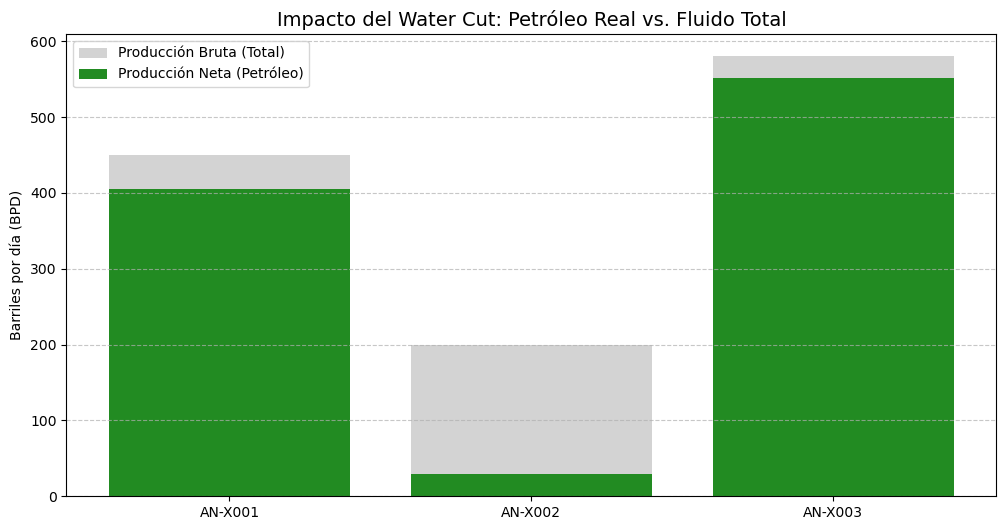

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from funciones_petroleras import procesar_datos_produccion, categorizar_pozos, calcular_produccion_neta

# 1. Flujo de datos completo
df = procesar_datos_produccion("datos_campo.csv")
df = categorizar_pozos(df)
df['water_cut'] = [10, 85, 5, 95, 0] # Simulación de campo
df = calcular_produccion_neta(df)

# 2. Filtro de Calidad (Solo pozos con datos reales y positivos)
df_valid = df[df['prod_neta_petroleo'] > 0].copy() # Sin esto, el gráfico se vería distorsionado o daría error.

# 3. Creación del gráfico de comparación
plt.figure(figsize=(12, 6))
x = df_valid['pozo_id']
y_total = df_valid['prod_real_bpd']
y_neta = df_valid['prod_neta_petroleo']

plt.bar(x, y_total, label='Producción Bruta (Total)', color='lightgrey')
plt.bar(x, y_neta, label='Producción Neta (Petróleo)', color='forestgreen')

plt.title("Impacto del Water Cut: Petróleo Real vs. Fluido Total", fontsize=14)
plt.ylabel("Barriles por día (BPD)")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

### 📊 Conclusión del Análisis de Fluido
* **Identificación de Ineficiencia:** El pozo AN-X002 presenta el mayor impacto por Water Cut (85%), produciendo solo 30 BPD de petróleo neto frente a 200 BPD de fluido bruto.

* **Impacto Operativo:** Se recomienda revisar la integridad del pozo o el ajuste de la bomba para reducir el costo de levantamiento por barril neto.

* **Optimización:** Los pozos AN-X001 y AN-X003 mantienen una excelente relación bruto/neto, representando el 90% de la rentabilidad actual de la muestra.
 + Pozo AN-X003 (Lider de Producción): Presenta una eficiencia óptima y un WC bajo (5%). Es el activo más rentable de la muestra.

In [16]:
df_masivo = pd.read_csv("../datos/datos_campo_masivos.csv")
print(f"Dataset cargado: {df_masivo.shape[0]} pozos encontrados.")

Dataset cargado: 100 pozos encontrados.


In [17]:
from funciones_petroleras import procesar_datos_produccion, categorizar_pozos, calcular_produccion_neta

# 1. Cargamos el dataset masivo (el CSV ya tiene la columna 'water_cut')
df_masivo = procesar_datos_produccion("datos_campo_masivos.csv")

# 2. Categorizamos
df_masivo = categorizar_pozos(df_masivo)

# 3. Calculamos Petróleo Neto 
# (Ahora la función tomará el 'water_cut' real del archivo automáticamente)
df_masivo = calcular_produccion_neta(df_masivo)

# 4. Verificamos los primeros 5 para estar seguros
print("✅ Procesamiento masivo exitoso:")
print(df_masivo[['pozo_id', 'water_cut', 'prod_neta_petroleo', 'categoria']].head())
#Analizamos los que estan entre el 10% de water_cut
df_10_porciento= df_masivo[df_masivo['water_cut'].between(7.5, 10.5, inclusive="neither")]
df_10_porciento

✅ Procesamiento masivo exitoso:
  pozo_id  water_cut  prod_neta_petroleo  categoria
0  AN-001  13.126079          153.876484    Crítico
1  AN-002  80.177225           97.396453    Crítico
2  AN-003  33.870206          100.502281    Crítico
3  AN-004  21.786666          325.305294  Monitoreo
4  AN-005   8.669763           71.878740    Crítico


,pozo_id,prod_teorica_bpd,prod_real_bpd,water_cut,eficiencia,barriles_perdidos,categoria,prod_neta_petroleo
4,AN-005,471,78.702018,8.669763,16.709558,392.297982,Crítico,71.87874


In [18]:
# 1. Definimos el precio del barril
PRECIO_BARRIL = 75 

# 2. Calculamos la pérdida diaria en dólares
df_masivo['perdida_usd_dia'] = (df_masivo['prod_teorica_bpd'] - df_masivo['prod_real_bpd']) * PRECIO_BARRIL

# 3. Ordenamos para ver el "Top 10 de Oportunidades"
top_10_perdidas = df_masivo.sort_values(by='perdida_usd_dia', ascending=False).head(10)

# # Visualizaremos que el Top 10 mantenga su lógica de "pérdida" pero esté ordenado por nombre:
# top_10_por_nombre = top_10_perdidas.sort_values(by='pozo_id')

print("💵 TOP 10 POZOS CON MAYOR PÉRDIDA ECONÓMICA (USD/DÍA):")
print("-" * 55)
print(top_10_perdidas[['pozo_id', 'categoria', 'perdida_usd_dia']])

# 4. Cálculo del impacto total del yacimiento
total_perdida = df_masivo['perdida_usd_dia'].sum()
print(f"\n💸 Impacto Total del Diferido en el Yacimiento: USD {total_perdida:,.2f} / día")

💵 TOP 10 POZOS CON MAYOR PÉRDIDA ECONÓMICA (USD/DÍA):
-------------------------------------------------------
   pozo_id categoria  perdida_usd_dia
5   AN-006   Crítico     83250.000000
81  AN-082   Crítico     73396.437959
67  AN-068   Crítico     61696.574282
36  AN-037   Crítico     59494.462269
77  AN-078   Crítico     59140.997882
94  AN-095   Crítico     57583.142208
34  AN-035   Crítico     57495.398618
64  AN-065   Crítico     57244.244436
91  AN-092   Crítico     56328.557359
7   AN-008   Crítico     54843.905177

💸 Impacto Total del Diferido en el Yacimiento: USD 2,831,637.64 / día


### Scatter Plot (Gráfico de Dispersión)

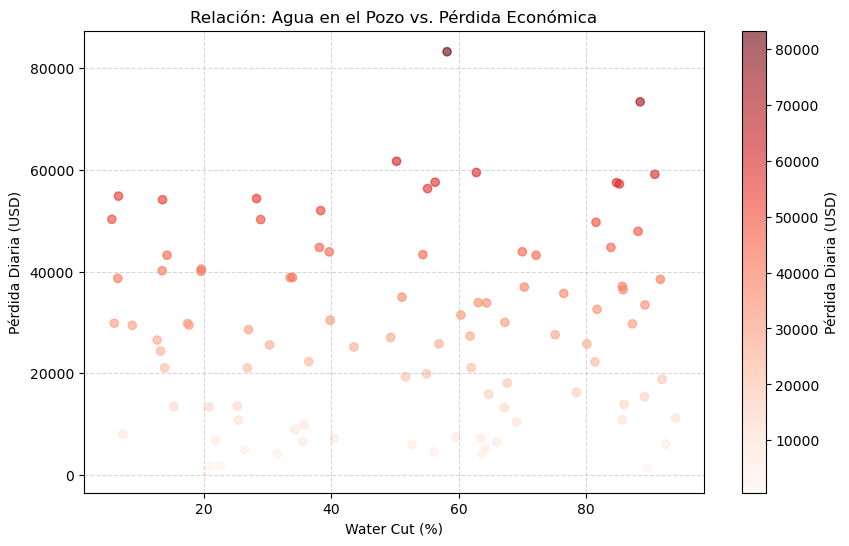

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Graficamos: Eje X = Water Cut, Eje Y = Pérdida en USD
plt.scatter(df_masivo['water_cut'], df_masivo['perdida_usd_dia'], 
            alpha=0.6, c=df_masivo['perdida_usd_dia'], cmap='Reds')

plt.colorbar(label="Pérdida Diaria (USD)")
plt.title("Relación: Agua en el Pozo vs. Pérdida Económica")
plt.xlabel("Water Cut (%)")
plt.ylabel("Pérdida Diaria (USD)")
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

In [20]:
# Calculamos la pérdida en USD para este pozo específico
PRECIO_BARRIL = 75
df_10_porciento = df_10_porciento.copy() # Evitamos el warning de SettingWithCopy
df_10_porciento['perdida_usd_dia'] = (df_10_porciento['prod_teorica_bpd'] - df_10_porciento['prod_real_bpd']) * PRECIO_BARRIL

print(f"🚨 Alerta Operativa: Pozo {df_10_porciento.iloc[0]['pozo_id']}")
print(f"Pérdida diaria: USD {df_10_porciento.iloc[0]['perdida_usd_dia']:,.2f}")

🚨 Alerta Operativa: Pozo AN-005
Pérdida diaria: USD 29,422.35


### 📄 Automatización de Reportes Gerenciales (PDF)
#### 1. Objetivo de la Tarea
El objetivo es transformar el análisis de datos masivos del yacimiento en un documento profesional y portable. Esto permite que los hallazgos críticos (como las pérdidas económicas por ineficiencia) lleguen a los tomadores de decisiones sin necesidad de que estos abran un entorno de programación.

#### 2. Librería Utilizada: fpdf
Para esta tarea utilizamos **FPDF**, una librería mínima y potente para la generación de PDFs en Python.

##### Instalación:

 + **Bash**
 + **pip install fpdf**
#### 3. Funciones Principales del Script
El proceso de exportación se divide en tres etapas lógicas:

* **Generación de Evidencia Visual**: Se utiliza matplotlib para crear un gráfico de dispersión (Scatter Plot) que vincula el Water Cut con la pérdida en USD. Este gráfico se guarda temporalmente como una *imagen .png*.

* **Construcción del Documento**: La clase ReportePetrolero hereda de FPDF para automatizar el encabezado y el pie de página en cada hoja.

* **Inyección de Datos Críticos**: Se realiza un filtrado de los Top 5 pozos con mayor pérdida diaria mediante el método .sort_values() de Pandas, volcando esa información en una tabla formateada dentro del PDF.

#### 4. Hallazgos en el Reporte
Gracias a esta automatización, se detectaron pozos con pérdidas superiores a USD 80,000 diarios, permitiendo priorizar las intervenciones de mantenimiento basadas en el impacto económico real y no solo en variables técnicas.

In [21]:
# def generar_reporte_seguro(df_analisis):
#     # 1. Gráfico
#     plt.figure(figsize=(8, 5))
#     plt.scatter(df_analisis['water_cut'], df_analisis['perdida_usd_dia'], 
#                 alpha=0.6, c=df_analisis['perdida_usd_dia'], cmap='Reds')
#     plt.title("Analisis de Perdidas - Proyecto Anelo 2026")
#     plt.xlabel("Water Cut (%)")
#     plt.ylabel("Perdida Diaria (USD)")
    
#     ruta_grafico = "temp_grafico.png"
#     plt.savefig(ruta_grafico, dpi=100)
#     plt.close()

#     # 2. PDF con configuración robusta
#     pdf = ReportePetrolero() # Usamos la clase que ya definiste
#     pdf.add_page()
    
#     # Título principal
#     pdf.set_font('Arial', 'B', 16)
#     pdf.set_text_color(200, 0, 0)
#     pdf.cell(0, 15, 'ALERTA: IMPACTO ECONOMICO DIARIO', 0, 1, 'C')
#     pdf.ln(5)

#     # Insertar Imagen (Asegurando que existe)
#     if os.path.exists(ruta_grafico):
#         pdf.image(ruta_grafico, x=15, w=180)
#         pdf.ln(10)

#     # Tabla de datos
#     pdf.set_font('Arial', 'B', 11)
#     pdf.set_text_color(0, 0, 0)
#     pdf.cell(0, 10, 'Detalle de Pozos Criticos (Top 5):', 0, 1)
    
#     pdf.set_font('Arial', '', 10)
#     top_5 = df_analisis.sort_values('perdida_usd_dia', ascending=False).head(5)
    
#     for index, row in top_5.iterrows():
#         texto = f"ID: {row['pozo_id']} | Agua: {row['water_cut']:.1f}% | Perdida: USD {row['perdida_usd_dia']:,.0f}"
#         pdf.cell(0, 8, texto, 1, 1)

#      # Tabla de datos TOTALES

#     # Título de la sección
#     pdf.set_font('Arial', 'B', 11)
#     pdf.set_text_color(0, 0, 0)
#     pdf.cell(0, 10, 'Pérdida Total Estimada del Yacimiento:', 0, 1)

#     # Espacio controlado (sustituye al \n)
#     pdf.ln(2) 

#     # Texto formateado (sin emoji para evitar errores de librería)
#     texto = f"Impacto Total del Diferido en el Yacimiento: USD {total_perdida:,.2f} / día"

#     # Dibujar la celda con borde
#     pdf.cell(0, 10, texto, border=1, ln=1, align='L')

   
#     # Guardado final con ruta absoluta para no perderlo
#     ruta_final = os.path.abspath("../Reporte_Final_YPF_2026.pdf")
#     pdf.output(ruta_final)
    
#     # Limpiar imagen
#     if os.path.exists(ruta_grafico):
#         os.remove(ruta_grafico)
        
#     print(f"✅ ¡Ahora sí! Reporte generado correctamente en: {ruta_final}")

# # Ejecutamos la nueva versión
# generar_reporte_seguro(df_masivo)

### 📈 Mejora: Consolidación de Impacto Económico Total
Se añadió una métrica de **Impacto Total del Diferido** al encabezado del reporte. 
Esta cifra se calcula sumando la columna `perdida_usd_dia` de todo el DataFrame:
`total_perdida = df_masivo['perdida_usd_dia'].sum()`.

**Función del dato:** Contextualizar las pérdidas individuales dentro del balance general de la operación, permitiendo una visión macro de la ineficiencia del yacimiento.

### 🧪 Cápsula de Conocimiento Industrial

#### **Tema: El "Diferido" vs. "Pérdida Real"**

En la jerga de **Industrial Oil-gas**, lo que calculamos (USD 2,831,637) se conoce técnicamente como **Producción Diferida**.

*   **La Fórmula:**  
    $$Diferido = Potencial - Producción\ Actual$$

> **¿Por qué importa?**  
> En petróleo, ese dinero no "desaparece" (el crudo sigue bajo tierra), pero el retraso en extraerlo afecta el **Valor Presente Neto (VPN)** del proyecto. Por eso tu reporte es tan urgente: cada día de diferido es dinero que pierde valor por el paso del tiempo.


In [ ]:
# 1. Aseguramos que el path sea correcto
import sys
import os
ruta_src = os.path.abspath(os.path.join(os.getcwd(), '..', 'src'))
if ruta_src not in sys.path:
    sys.path.append(ruta_src)

# 2. Importamos la función
from reporte_motor import generar_reporte_profesional

# 3. EJECUCIÓN LIMPIA 
try:
    ruta = generar_reporte_profesional(df_masivo)
    print(f"✅ ¡LOGRADO! Reporte profesional generado en: {ruta}")
except Exception as e:
    print(f"❌ Error durante la generación: {e}")

✅ ¡LOGRADO! Reporte profesional generado en: d:\LEARNING\PROYECTO\src\..\assets\Reporte_Final_YPF_2026.pdf
